# ENVIRONMENT

In [3]:
import tensorflow as tf

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")



Version:  2.10.0
Eager mode:  True
GPU is NOT AVAILABLE


In [2]:
! pip install nltk sklearn numpy pandas

In [3]:
! pip install --upgrade pandas

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/afterlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/afterlab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/afterlab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/afterlab/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

import re
import string 



from nltk.tokenize import RegexpTokenizer
LEMMA = nltk.WordNetLemmatizer()
STOP_WORDS = stopwords.words('english')



from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# suppress scientific notation in Pandas
pd.options.display.float_format = "{:.2f}".format
pd.set_option("display.max_colwidth", 5000)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
# pd.set_option("precision", 3)
pd.set_option("display.max_colwidth", None)

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.dpi"] = 150

sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

import warnings

warnings.filterwarnings("ignore")

RANDOM_STATE = 1

In [6]:
original_df = pd.read_json("./src/amazon/reviews_Digital_Music_5.json", lines=True)


In [ ]:
# DATA PREPATION STEPS
# 1. Import data set as a data frame.
prep_df = original_df[["reviewText", "overall"]].copy()

prep_df = prep_df.rename(columns={"reviewText": "text", "overall": "sentiment"})
prep_df = prep_df[prep_df.sentiment != 3]

# 2. Load packages for TensorFlow, Keras, and other libraries.

# 3. EDA – to better understand the data structure.
original_df.head(1)
# original_df.info()
original_df.shape

# 4. Remove unusual characters: uppercase letters, punctuation marks, emoticons, and non-English characters.
prep_df["words"] = prep_df.text.apply(lambda x: clean_text(s=x))
prep_df["wordCount"] = prep_df.text.apply(lambda x: len(x.split(" ")))


prep_df.head(1)


# pd.DataFrame(words)
# words = re.split(r'\W+', words.reviewText)
# prep_df["words"] = prep_df.words.str.split()
# prep_df["words"] = prep_df.words.str.split(r'\W+')
# prep_df["words"]

# prep_df.head(1)

# 5. Measure the vocabulary size using (bags of words, etc.).


# 6. Explore N-Gram (unigram, bigram, and trigram) structures for usefulness in text analysis as applicable.

# 7. Determine the word embedding and explore embedded words based on target inputs.

# 8. Set the maximum sequence length based on the length of the longest sentence in the data set.

# 9. Tokenize sentences into a list of tokens and remove stop words.

# 10. Pad cleaned sentences to fit the maximum sequence length after each text sequence.

# 11. Create an activation function filled with dense layers of the neural network.

# 12. Split the data set into training and test sets or into training/test/validation sets.


In [ ]:
# 1.	Analyzing the data and review length.

# 2.	Creating a dictionary and applying it to remove extraneous characters.
# 3.	Deciding on a typical review length.
# 4.	Tokenization.
# 5.	Applying Tensorflow’s keras and layers methods
# 6.	Splitting the dataset into train and test
# 7.	Fitting the model
# 8.	Model evaluation and reporting.


In [ ]:
# For Task Two: Actually, it is pretty simple.  There are three text files, Amazon, IMDB, and Yelp.  You want to do a neural net to find the Sentiment index among the reviews.  These are the high-level ten basic steps:

# 1.	If you run a couple of FOR loops to translate characters (essentially “cleaning up”).   There will be 52 unique characters remaining.
# 2.	Plot a histogram to find the length of the reviews. Most of the 500 reviews will be under 150 characters in length.
# 3.	Create a dictionary for characters and tokens.
# 4.	Use arrays to hold each review and assign to it a list of one-hot-encoded characters.
# 5.	Code the output array to represent the review as positive (1) or negative (0).  The target value is binary.
# 6.	Add terminators to the end of the data to fill the fixed length strings.
# 7.	Using sklearn, numpy, and keras train a neural net.  Split data prior to training into test and validation.
# 8.	By reading through the data in the network, weights are adjusted until errors are minimized.  Each period or cycle is referred to as an epoch.
# 9.	Then, you run a sequential neural net using keras.Sequential()
# 10.	After using the training process iteratively, the model.evaluate(x, y) will confirm the reliability. 


# Introduction

You have seen the power of using data analytical techniques to help organizations make data-driven decisions and now want to extend these models into areas of machine learning and artificial intelligence. In this task, you will explore the use of neural networks and natural language processing (NLP).

In this task, you will choose a data file from the Web Links section. The available data sets are as follows:
- [Amazon Product Data set](http://jmcauley.ucsd.edu/data/amazon/)
- [UCSD Recommender Systems Data sets](https://cseweb.ucsd.edu/~jmcauley/datasets.html)
- UCI Sentiment Labeled Sentences Data set

For this task, you will build a neural network designed to learn word usage and context using NLP techniques. You will provide visualizations and a report, as well as build your network in an interactive development environment.

In the telecom munications industry, customers can choose from multiple service providers and actively switch from one provider to another. Customer churn is defined as the percentage of customers who stopped using a provider’s product or service during a certain time frame. In this highly competitive market, some telecommunications industries can experience average annual churn rates as high as 25 Given that it costs 10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many providers retaining highly profitable customers is the number one business goal. To reduce customer churn, telecom munications companies need to predict which customers are at high risk of churn.

As part of the “churn” project, executives would like to see consider a time series on revenue from the first years of operation. Once they understand any patterns in that data, they feel confident in understanding the impact of churn in current times. The given time series data records the daily revenue, in million dollars, during the first two years of operation.

**Data File being used:**
teleco_time_series.csv

**Data Dictionary:**
- The data set consists of 731 rows and two columns:
    - Day Day during first two years of operation
    - Revenue Revenue in million dollars
    
Review the data dictionary and considerations related to the raw data file you have chosen and prepare the data for time series modeling. You will then analyze that data set using time series modeling, create visualizations, generate forecasts, and deliver the results of your analysis.

# Part I:  Research Question

## A.  Describe the purpose of this data analysis by doing the following:



### 1.  Summarize one research question that you will answer using neural network models and NLP techniques. Be sure the research question is relevant to a real-world organizational situation and sentiment analysis captured in your chosen dataset.



### 2.  Define the objectives or goals of the data analysis. Be sure the objectives or goals are reasonable within the scope of the research question and are represented in the available data.



### 3.  Identify a type of neural network capable of performing a text classification task that can be trained to produce useful predictions on text sequences on the selected data set.


# Part II:  Data Preparation


## B.  Summarize the data cleaning process by doing the following:



### 0. Misc. Data Prep

In [66]:
TOKENIZER = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token = '[UNK]', lower=True)

def clean_text(s:str, tokenizer) -> str:
    tokens = [LEMMA.lemmatize(word=word) for word in s]

    # remove stop words     
    tokens = [word for word in tokens if word not in STOP_WORDS]

    # rejoin tokens into a string
    return " ".join(tokens)



def get_index(data, tokenizer, n=25,reverse=True):
    
    # tokenizer = Tokenizer(num_words=5000)
    # tokenizer.fit_on_texts(review)
    # # tokenizer
    # vocab_size = len(tokenizer.word_index) + 1   
    
    # t = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token = '[UNK]', lower=True)
    tokenizer.fit_on_texts(data)
    index = tokenizer.word_index
    
    sorted_index = dict(sorted(index.items(), key= lambda kv:(kv[1], kv[0]), reverse=reverse)[0:n])
    return tokenizer, len(index) + 1, sorted_index

In [9]:
original_df.shape

(64706, 9)

In [10]:
original_df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [12]:
original_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64706 entries, 0 to 64705
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      64706 non-null  object
 1   asin            64706 non-null  object
 2   reviewerName    64529 non-null  object
 3   helpful         64706 non-null  object
 4   reviewText      64706 non-null  object
 5   overall         64706 non-null  int64 
 6   summary         64706 non-null  object
 7   unixReviewTime  64706 non-null  int64 
 8   reviewTime      64706 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.4+ MB


In [119]:
%%time
prep_df = original_df[["reviewText", "overall"]].copy()
prep_df = prep_df.rename(columns={"reviewText": "raw_text", "overall": "sentiment"})
prep_df["raw_word_count"] = prep_df.raw_text.apply(lambda x: len(x.split(" ")))
text_stages_df = prep_df[["raw_text"]].head()


# drop reviews with neutral sentiment
prep_df = prep_df[prep_df.sentiment != 3]
# map sentiment scores to binary values (0 = negative, 1 = positive)
prep_df["pos_neg_sentiment"] = prep_df.sentiment.map(lambda x: 1 if x > 3 else 0 )

prep_df.head(1)

,raw_text,sentiment,raw_word_count
0,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,153


In [123]:
%%time

# strip white space and lowercase review
prep_df["clean_text"] = prep_df["raw_text"].str.strip().str.lower()
text_stages_df["cleanStage1"] = prep_df["clean_text"].head()

# remove non-word characters
prep_df["clean_text"] = prep_df["clean_text"].apply(lambda x: " ".join(RegexpTokenizer("[a-z-A-Z']+").tokenize(x)))
text_stages_df["cleanStage2"] = prep_df["clean_text"].head()

# Remove unusual characters: uppercase letters, punctuation marks, emoticons, and non-English characters.
prep_df["clean_text"] = prep_df["clean_text"].apply(lambda x: " ".join(tf.keras.preprocessing.text.text_to_word_sequence(x)))
text_stages_df["cleanStage3"] = prep_df["clean_text"].head()

# lemmatize and remove english stop words
prep_df["clean_text"] = prep_df["clean_text"].apply(lambda x: clean_text(s=x.split(" "), tokenizer=TOKENIZER))
text_stages_df["cleanStage4"] = prep_df["clean_text"].head()
prep_df["clean_word_count"] = prep_df.clean_text.apply(lambda x: len(x.split(" ")))


prep_df.head(1)


CPU times: user 51.9 s, sys: 71.1 ms, total: 52 s
Wall time: 52 s


,raw_text,sentiment,raw_word_count,textClean,clean_text,clean_word_count
0,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,153,hard believe memory tree came year ago ha held well passage time enya's last great album new age pop amarantine day without rain back enya still creative spark voice agree reviewer said saddest album melancholy bittersweet opening title song memory tree elegaic majestic pax deorum sound like requiem mass dark threnody unlike reviewer said ha disconcerting blend spirituality sensuality find disconcerting anywhere hopeful song looking possibility hope ha place love listener decide romantic platonic etc i've always soft spot song way home triumphant ending return truly masterpiece new age music must enya fan,hard believe memory tree came year ago ha held well passage time enya's last great album new age pop amarantine day without rain back enya still creative spark voice agree reviewer said saddest album melancholy bittersweet opening title song memory tree elegaic majestic pax deorum sound like requiem mass dark threnody unlike reviewer said ha disconcerting blend spirituality sensuality find disconcerting anywhere hopeful song looking possibility hope ha place love listener decide romantic platonic etc i've always soft spot song way home triumphant ending return truly masterpiece new age music must enya fan,93


In [124]:
text_stages_df

,raw_text,cleanStage1,cleanStage2,cleanStage3,cleanStage4
0,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!","it's hard to believe ""memory of trees"" came out 11 years ago;it has held up well over the passage of time.it's enya's last great album before the new age/pop of ""amarantine"" and ""day without rain."" back in 1995,enya still had her creative spark,her own voice.i agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""memory of trees"" is elegaic&majestic.;""pax deorum"" sounds like it is from a requiem mass,it is a dark threnody.unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,i don't find it disconcerting at all.""anywhere is"" is a hopeful song,looking to possibilities.""hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.i've always had a soft spot for this song.""on my way home"" is a triumphant ending about return.this is truly a masterpiece of new age music,a must for any enya fan!",it's hard to believe memory of trees came out years ago it has held up well over the passage of time it's enya's last great album before the new age pop of amarantine and day without rain back in enya still had her creative spark her own voice i agree with the reviewer who said that this is her saddest album it is melancholy bittersweet from the opening title song memory of trees is elegaic majestic pax deorum sounds like it is from a requiem mass it is a dark threnody unlike the reviewer who said that this has a disconcerting blend of spirituality sensuality i don't find it disconcerting at all anywhere is is a hopeful song looking to possibilities hope has a place is about love but it is up to the listener to decide if it is romantic platonic etc i've always had a soft spot for this song on my way home is a triumphant ending about return this is truly a masterpiece of new age music a must for any enya fan,it's hard to believe memory of trees came out years ago it has held up well over the passage of time it's enya's last great album before the new age pop of amarantine and day without rain back in enya still had her creative spark her own voice i agree with the reviewer who said that this is her saddest album it is melancholy bittersweet from the opening title song memory of trees is elegaic majestic pax deorum sounds like it is from a requiem mass it is a dark threnody unlike the reviewer who said that this has a disconcerting blend of spirituality sensuality i don't find it disconcerting at all anywhere is is a hopeful song looking to possibilities hope has a place is about love but it is up to the listener to decide if it is romantic platonic etc i've always had a soft spot for this song on my way home is a triumphant ending about return this is truly a masterpiece of new age music a must for any enya fan,hard believe memory tree came year ago ha held well passage time enya's last great album new age pop amarantine day without rain back enya still creative sp

### ✅ 1.  Perform exploratory data analysis on the chosen dataset, and include an explanation of each of the following elements:


In [17]:
pd.DataFrame(original_df.isnull().sum(), columns=["# Nulls"])
f"{original_df.isnull().sum().sum():,} Total Null Cells"


,# Nulls
reviewerID,0
asin,0
reviewerName,177
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


'177 Total Null Cells'

#### Sentiment Counts (1-5)

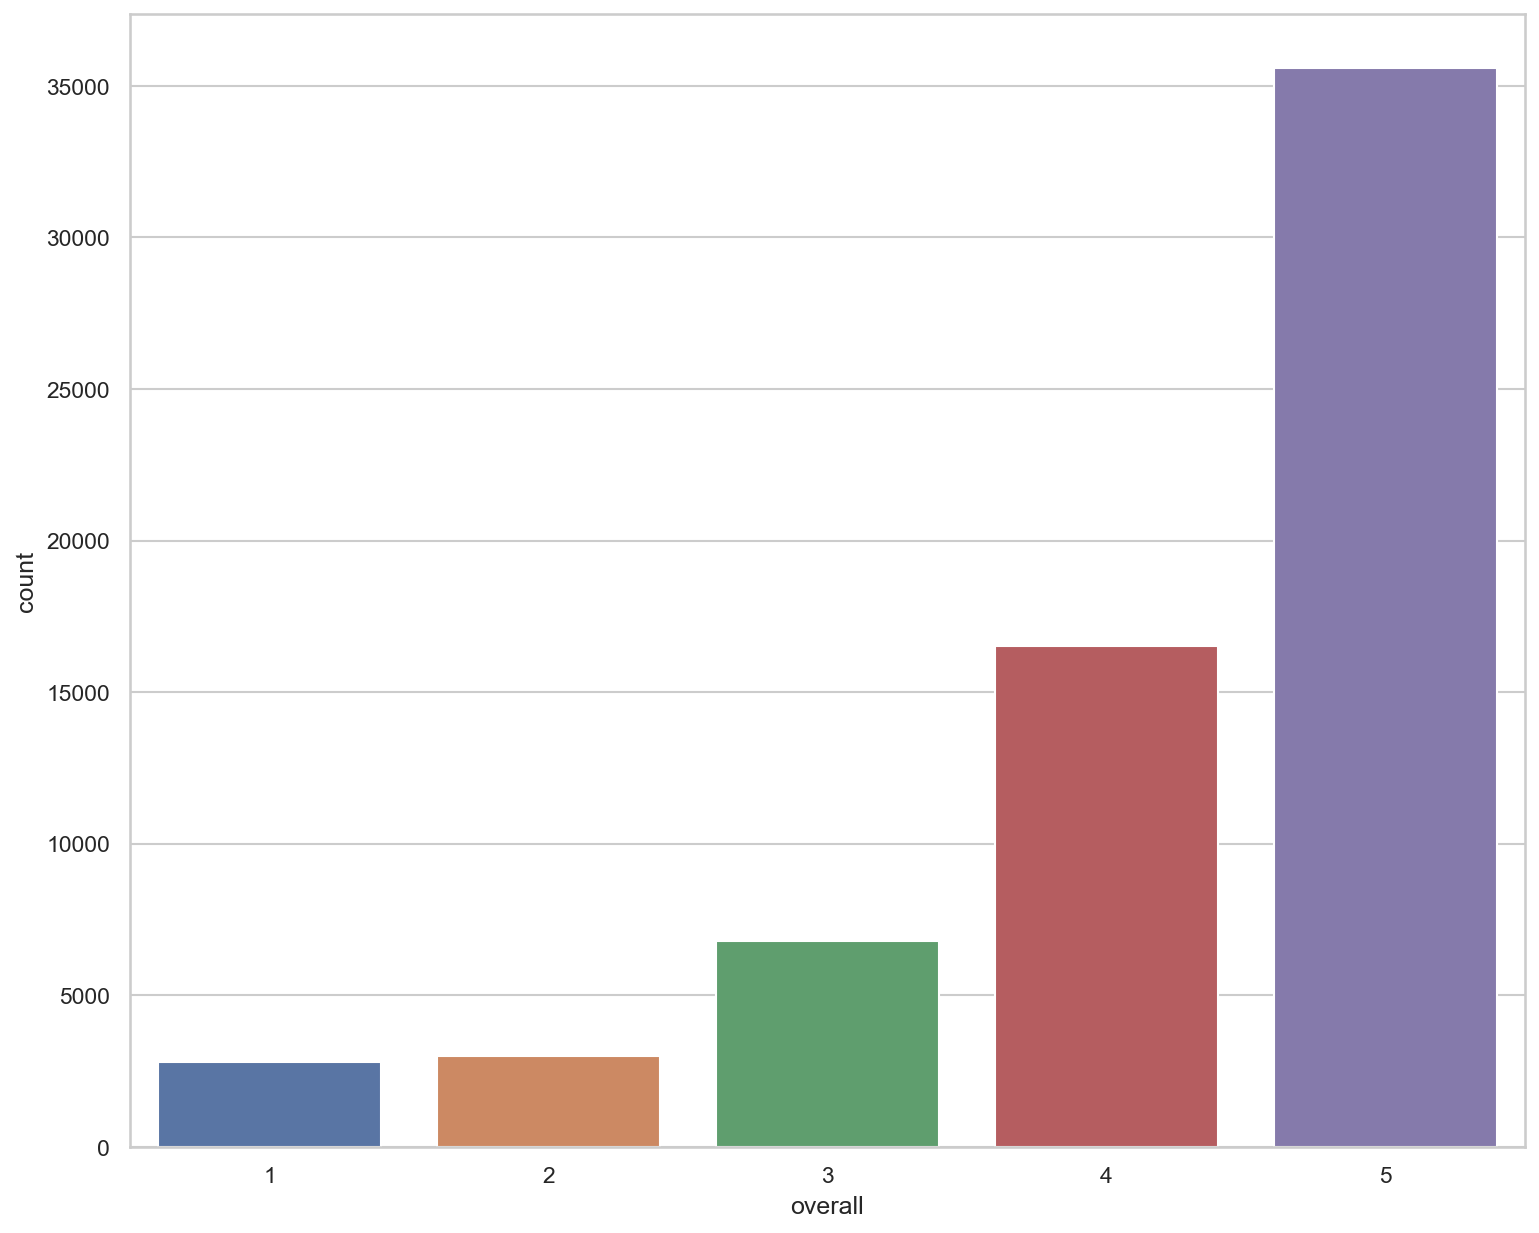

In [18]:
ax = sns.countplot(x=original_df.overall)

#### Sentiment Counts (Neutral Removed)

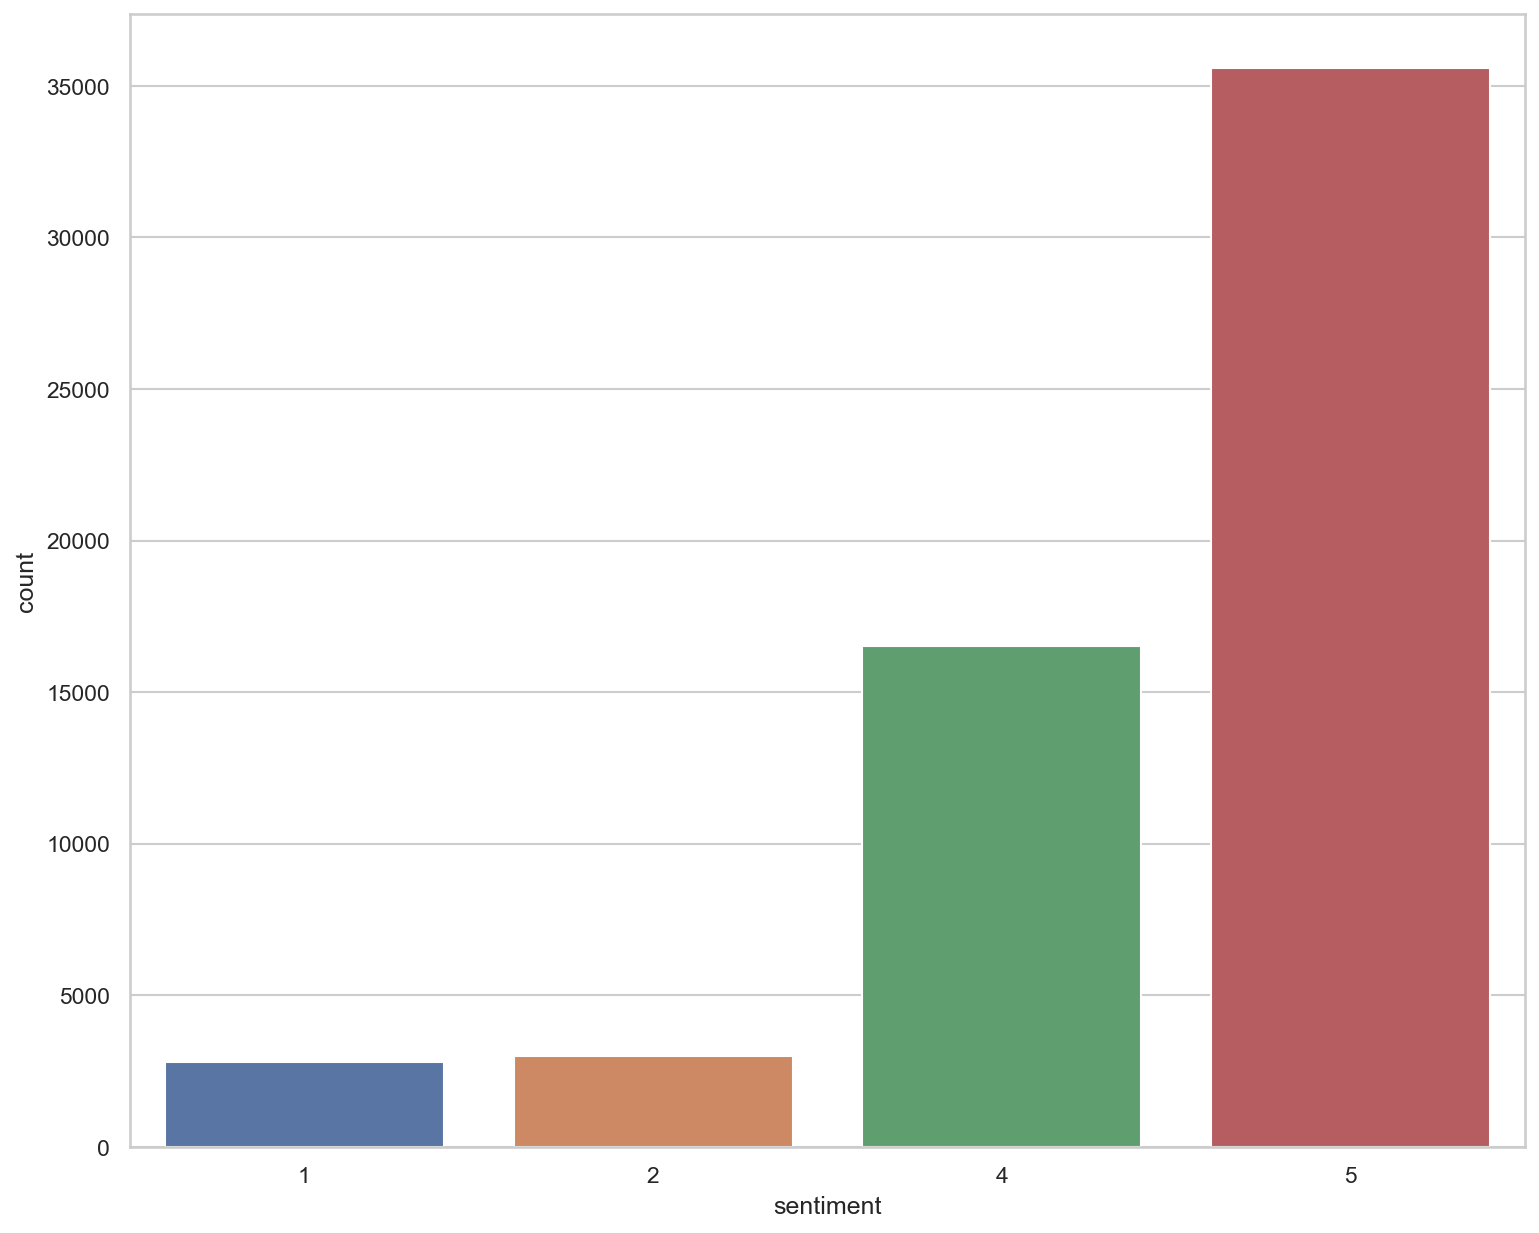

In [19]:
ax = sns.countplot(x=prep_df.sentiment)

#### Sentiment Counts (Pos or Neg)

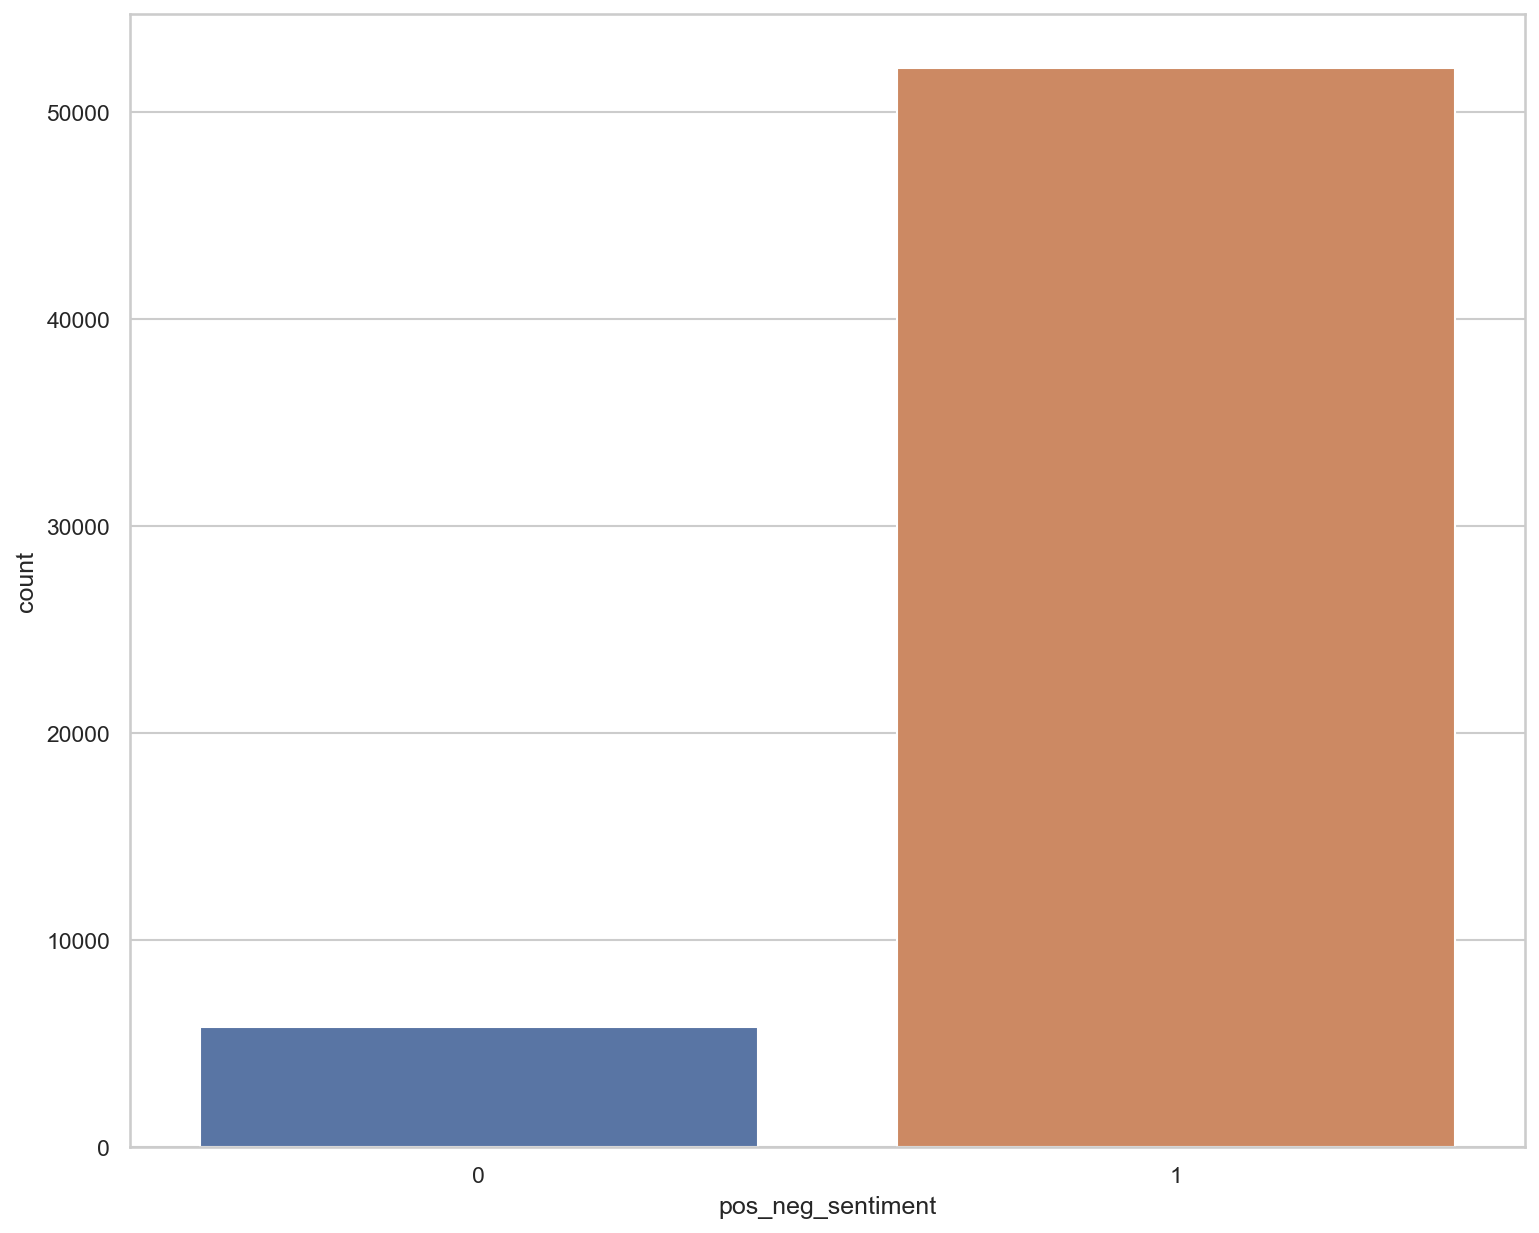

In [270]:
prep_df["pos_neg_sentiment"] = prep_df.sentiment.map(lambda x: 1 if x > 3 else 0 )

ax = sns.countplot(x=prep_df.pos_neg_sentiment)
plt.show()

In [115]:
prep_df.head(1)

,raw_text,sentiment,textClean
0,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,hard believe memory tree came year ago ha held well passage time enya's last great album new age pop amarantine day without rain back enya still creative spark voice agree reviewer said saddest album melancholy bittersweet opening title song memory tree elegaic majestic pax deorum sound like requiem mass dark threnody unlike reviewer said ha disconcerting blend spirituality sensuality find disconcerting anywhere hopeful song looking possibility hope ha place love listener decide romantic platonic etc i've always soft spot song way home triumphant ending return truly masterpiece new age music must enya fan


In [ ]:
# only perform these steps on the training data
review = prep_df.text
avg_review_word_count = round(prep_df.wordCount.mean())
print(f"{avg_review_word_count = }")
# keep 5000 most popular words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review)
# tokenizer
vocab_size = len(tokenizer.word_index) + 1
print(f"{vocab_size = }")
encoded_reviews = tokenizer.texts_to_sequences(review)
# encoded_reviews
padded_sequence = pad_sequences(encoded_reviews, maxlen=avg_review_word_count, padding="post")
# padded_sequence

# prep_df.head()

In [ ]:
print(f"{tokenizer.word_index = }")


In [ ]:
print(f"{review[0] = }", end="\n\n")

print(f"{encoded_reviews[0] = }", end="\n\n")

print(f"{padded_sequence[0] = }", end="\n\n")

In [ ]:
embedding_vector_length = 32

# BUILD THE NETWORK
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

# `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
model = Sequential()

# Embedding
# Turns positive integers (indexes) into dense vectors of fixed size.
model.add(Embedding(input_dim=vocab_size + 1, output_dim=embedding_vector_length, input_length=avg_review_word_count )) 

# SpatialDropout1D
# This version performs the same function as Dropout, however, it drops
# entire 1D feature maps instead of individual elements. If adjacent frames
# within feature maps are strongly correlated (as is normally the case in
# early convolution layers) then regular dropout will not regularize the
# activations and will otherwise just result in an effective learning rate
# decrease. In this case, SpatialDropout1D will help promote independence
# between feature maps and should be used instead.
model.add(SpatialDropout1D(rate=0.25))

model.add(LSTM(units=60, dropout=0.5, recurrent_dropout=0.5))

# Dropout
# The Dropout layer randomly sets input units to 0 with a frequency of `rate`
# at each step during training time, which helps prevent overfitting.
# Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
# all inputs is unchanged.

# A simple solution to the overfitting problem is to use dropout, an operation that will randomly drop the weights connected to certain nodes in a layer during the training process, as shown on the right. This will force your network to develop more robust rules for classification, since it cannot rely on any particular nodes being passed to an activation function. This will tend to improve out-of-sample performance.
# we want to drop the weights connected to 20% of nodes randomly. We'll then pass this to the output layer, which reduces the 60 nodes to 1 and applies a sigmoid activation function
model.add(Dropout(rate=0.2))

# Dense
# output shape should be 1 since this is binary data
model.add(Dense(units=1, activation="sigmoid"))

# Configures the model for training.
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")

# Prints a string summary of the network.
model.summary()


In [ ]:
history = model.fit(x=padded_sequence, y = prep_df.pos_neg, validation_split=0.2, epochs=5, batch_size=32)

# prep_df.pos_neg

In [ ]:
history.history

In [ ]:
# PLOT TRAINING AND VALIDATION ACCURACY SCORES

hist_df = pd.DataFrame(history.history)

num_epochs = range(1,6) 

_ = sns.lineplot(hist_df[["accuracy", "val_accuracy"]])
_ = plt.xticks(ticks=range(0,5), labels=num_epochs)
plt.show()

_ = sns.lineplot(hist_df[["loss", "val_loss"]])
_ = plt.xticks(ticks=range(0,5), labels=num_epochs)
plt.show()


In [ ]:
def predict_sentiment(text):
    tokenizer = Tokenizer(num_words=5000)
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen=199)
    prediction = int(model.predict(tw).round().item())
    return prediction

# predict_sentiment(text)
predict_sentiment(test_df.iloc[0].words)

# test_df.iloc[0].words


In [ ]:
test_df

#### ✅ a. presence of unusual characters (e.g., emojis, non-English characters, etc.)
> Unusual or non-word characters do exist within review texts


In [125]:
def get_non_words(data):
    non_word_tokenizer = RegexpTokenizer('[^a-zA-Z\s]')    

    # tokenize on non-word and non-space characters
    return non_word_tokenizer.tokenize(text=data)

tokens_df = original_df.reviewText.apply(lambda x: set(get_non_words(data=x)))
tokens_df

0                                {,, 5, ", 1, 9, &, ', !, /, ;, .}
1                                                     {-, ', ., ,}
2                                                        {,, ., '}
3                                            {,, ), (, -, ', !, .}
4        {7, 1, ?, ,, ', 0, ", /, 5, 2, -, 3, 8, ), (, 9, :, ;, .}
                                   ...                            
64701                                                          {.}
64702                                                 {-, !, ., '}
64703                                                       {., ,}
64704                            {,, #, ), (, &, 3, ', !, 4, ;, .}
64705                      {0, #, ,, ', ), (, 1, &, 3, 4, !, ;, .}
Name: reviewText, Length: 64706, dtype: object

In [126]:
token_set = set()

for tokens in tokens_df:
    for token in tokens:
        token_set.add(token)

print("Non-Word Tokens Exist")
print(sorted(list(token_set)))

Non-Word Tokens Exist
['\x03', '\x16', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


#### ✅ b. vocabulary size
> the vocabulary size is 122,270 words

In [159]:
rwc = prep_df.raw_word_count.describe(percentiles=[.25, .5, .75, .95]).round().astype(int)
cwc = prep_df.clean_word_count.describe(percentiles=[.25, .5, .75, .95]).round().astype(int)
delta = cwc/rwc
pd.DataFrame(zip(rwc, cwc, delta), index=rwc.index, columns=["Raw Word Count", "Clean Word Count", "Delta"])


199 *.55

,Raw Word Count,Clean Word Count,Delta
count,57917,57917,1.00
mean,199,110,0.55
std,193,107,0.55
min,1,1,1.00
25%,70,38,0.54
50%,141,77,0.55
75%,259,144,0.56
95%,571,316,0.55
max,4587,2529,0.55


109.45

In [162]:
tokenizer, vocab_size, word_index_top_k = get_index(data=prep_df.clean_text, tokenizer=TOKENIZER)

f"{tokenizer = }"
f"{len(tokenizer.word_index) +1 = }"
f"{vocab_size = }"
f"TOP 25 Words: {word_index_top_k = }"


'tokenizer = <keras.preprocessing.text.Tokenizer object at 0x7f8dfb75bfa0>'

'len(tokenizer.word_index) +1 = 122270'

'vocab_size = 122270'

'TOP 25 Words: word_index_top_k = {\'hoursofhappy\': 122269, \'damix\': 122268, \'babyx\': 122267, \'wbz\': 122266, "\'sunbroken": 122265, "\'sbankruptafter": 122264, "\'sembryonic": 122263, \'asnd\': 122262, \'likelymp\': 122261, \'isband\': 122260, "\'ssainthoodwith": 122259, "\'sceremonials": 122258, \'upreviews\': 122257, "\'stalk": 122256, "\'smanners": 122255, "\'sfar": 122254, "\'sout": 122253, "\'sstronger": 122252, "\'sgrowing": 122251, \'moto\': 122250, \'blumen\': 122249, \'abends\': 122248, \'umerei\': 122247, \'ndchen\': 122246, \'gondola\': 122245}'

In [169]:
# spot check cleaned review text
prep_df[["clean_text"]].sample(n=10)

,clean_text
33142,nine review important album curtis wa giant wa greatest accomplishment yet apparently masterpiece fly radar presume explain late 's curtis mayfield wa musical conscience black america pulled punch time took cheap shot never came across preachy yet always passed along message absolutely needed said moreover even cognizant message sheer majesty music shone wish i'd opportunity meet curtis year old whitey wa hero immense proportion curtis ha weak song horn string fabulous voice never tire listening record cd unlike recording one hit player stay end play move curtis may gone he'll never forgotten
9103,michael jackson produced bad bigger better thriller match sheer phenomenon release came close bad spawned memorable single title track cheesy undeniably well crafted infectious way make feel classic shuffling r b number man mirror michael syrupy gospel choir quite opposite smooth criminal unsettling lyric equally creepy claustrophobic beat recording heartbeat open murder themed track can't stop loving gorgeous ballad michael's siedah's voice mesh together brilliantly attempt recreate beat dirty diana fails duet stevie wonder good friend seems collapse weight pairing despite throwaway album track like speed demon leave alone gritty venture michael jackson's unparalleled imagination highly produced record immense variety bad represents ultimate pop perfection creating follow successful album time incredibly daunting bad michael jackson proved wa challenge star well packaged special edition come updated liner note extra track featuring b side interview clip quincy jones aside remastered sound bonus little improve original product enjoyable nonetheless
43406,hardcore another pathetic excuse commerical nonsense infamous shad aftermath ha tooffer guy can't rap song annoyingand beat worthlessthis guy rip crooked can't untilthis shady aftermath era overthis garbage
28366,bought cd majorly quot holla holla quot fact ja sound alot like one dmx i'm glad say ha offer raspy voice slick lyric good guest printed lyric guess he's saying can't get better thanx ja solid debut cd that's worth listening
18994,popped cd cd player blew away jimi hendrix experience's debut experienced one greatest debut time thanx jimi hendrix guitar playing vocal album may best album could hear grow arists album however one greatest musical achievement past year
59242,big fan much rap day eminem welcome surprise cd came great condition took bit wa well worht
44497,ha several b side track yet 'i'm fire' 'my hometown'ridiculus
61169,david guetta hello love inspiring song love wish could hit high note
9443,aic one finest band ever one killer album hit like sea sorrow man box aic deliver truly amazing way adore sound grungy thick crunchy great rhythm section fact layne dead way monumental loss music kurdt think best song ha quot aint like quot groove although aic bottom end groove enough adjective describe wicked guitar playing mr cantrell dirt maybe sap outshine one like title say wa begginning
50485,thing 'pop music pre aerial post aerial' new punk esque division musical genre like 'proto aerial' 'post aerial' nevertheless one solid album released conceptual beauty also hidden tiniest aspect need groundbreaking considered superb one interesting thing aerial besides want kate bush album focused melodically weird full strange dream vision sound like typical let made famous year ago comeback style u anyone else show desperation innovate matter cost instead sound like natural collection song anyone else could deliver singing excellent restrained previous album arrangement economic tastefull piano driven 'aerial' ballad nice drum viola touch songwriting excellent covering miriad thematics typical bush fashion word projecting image image reflecting sound sound reinforcing word album everyone give listen star


In [103]:

# # only perform these steps on the training data
# review = prep_df.text
# avg_review_word_count = round(prep_df.wordCount.mean())
# print(f"{avg_review_word_count = }")
# # keep 5000 most popular words
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(review)
# # tokenizer
# vocab_size = len(tokenizer.word_index) + 1
# print(f"{vocab_size = }")
# encoded_reviews = tokenizer.texts_to_sequences(review)
# # encoded_reviews
# padded_sequence = pad_sequences(encoded_reviews, maxlen=avg_review_word_count, padding="post")
# # padded_sequence

0                                                                      [hard, believe, memory, tree, came, year, ago, ha, held, well, passage, time, enya's, last, great, album, new, age, pop, amarantine, day, without, rain, back, enya, still, creative, spark, voice, agree, reviewer, said, saddest, album, melancholy, bittersweet, opening, title, song, memory, tree, elegaic, majestic, pax, deorum, sound, like, requiem, mass, dark, threnody, unlike, reviewer, said, ha, disconcerting, blend, spirituality, sensuality, find, disconcerting, anywhere, hopeful, song, looking, possibility, hope, ha, place, love, listener, decide, romantic, platonic, etc, i've, always, soft, spot, song, way, home, triumphant, ending, return, truly, masterpiece, new, age, music, must, enya, fan]
1                                                                                                                                                                                                                             

In [57]:
vocab_size, counts = get_index(data=prep_df.text)

vocab_size += 1
print(f"Vocab Size: {vocab_size:,}")
counts

Vocab Size: 129,253


{'atweh': 129252,
 'nasri': 129251,
 'instigate': 129250,
 'segu': 129249,
 'chiropractor': 129248,
 'sunsdoesn': 129247,
 'presencerakim': 129246,
 'songtom': 129245,
 'sandcons': 129244,
 'thingsbest': 129243,
 'solosenergybetter': 129242,
 'lengthepic': 129241,
 'conceptalbum': 129240,
 'masterpiececonclusion': 129239,
 'beautiful12': 129238,
 'moody11': 129237,
 'ps3': 129236,
 '5okay': 129235,
 'experimental10': 129234,
 'untraveled': 129233,
 'offbalanced': 129232,
 'catchy9': 129231,
 'throwback8': 129230,
 '5it': 129229,
 'exhilarating7': 129228}

#### ✅ c. proposed word embedding length

In [195]:
max_sequence_embedding = round(vocab_size ** (1/4))
max_sequence_embedding

max_review_length = int(round(prep_df[["clean_word_count"]].quantile(0.95)))

max_review_length

19

316

In [ ]:
# tf.keras.layers.Embedding(NUM_WORDS, EMBEDDING_SIZE)
tf.keras.layers.Embedding(vocab_size, max_sequence_embedding)


#### ✅ d. statistical justification for the chosen maximum sequence length

In [183]:
prep_df[["clean_word_count"]].describe(percentiles=[.25, .5, .75, .9, .95])

pct_95 = round(prep_df[["clean_word_count"]].quantile(0.95))

# r_len = []

# for r in prep_df.words:
#     r_len.append(len(r.split(" ")))

# max_len = round(np.mean(r_len))

# pd.DataFrame(dict(
#     mix= np.min(r_len),
#     med=np.median(r_len),
#     avg=np.mean(r_len),    
#     max= np.max(r_len)
#                  ), index=["Review Length"]).T


print(f"Based on the average review length, the max review length should be: {pct_95}")


,clean_word_count
count,57917.00
mean,109.55
std,106.94
min,1.00
25%,38.00
50%,77.00
75%,144.00
90%,241.00
95%,316.00
max,2529.00


Based on the average review length, the max review length should be: clean_word_count   316.00
Name: 0.95, dtype: float64


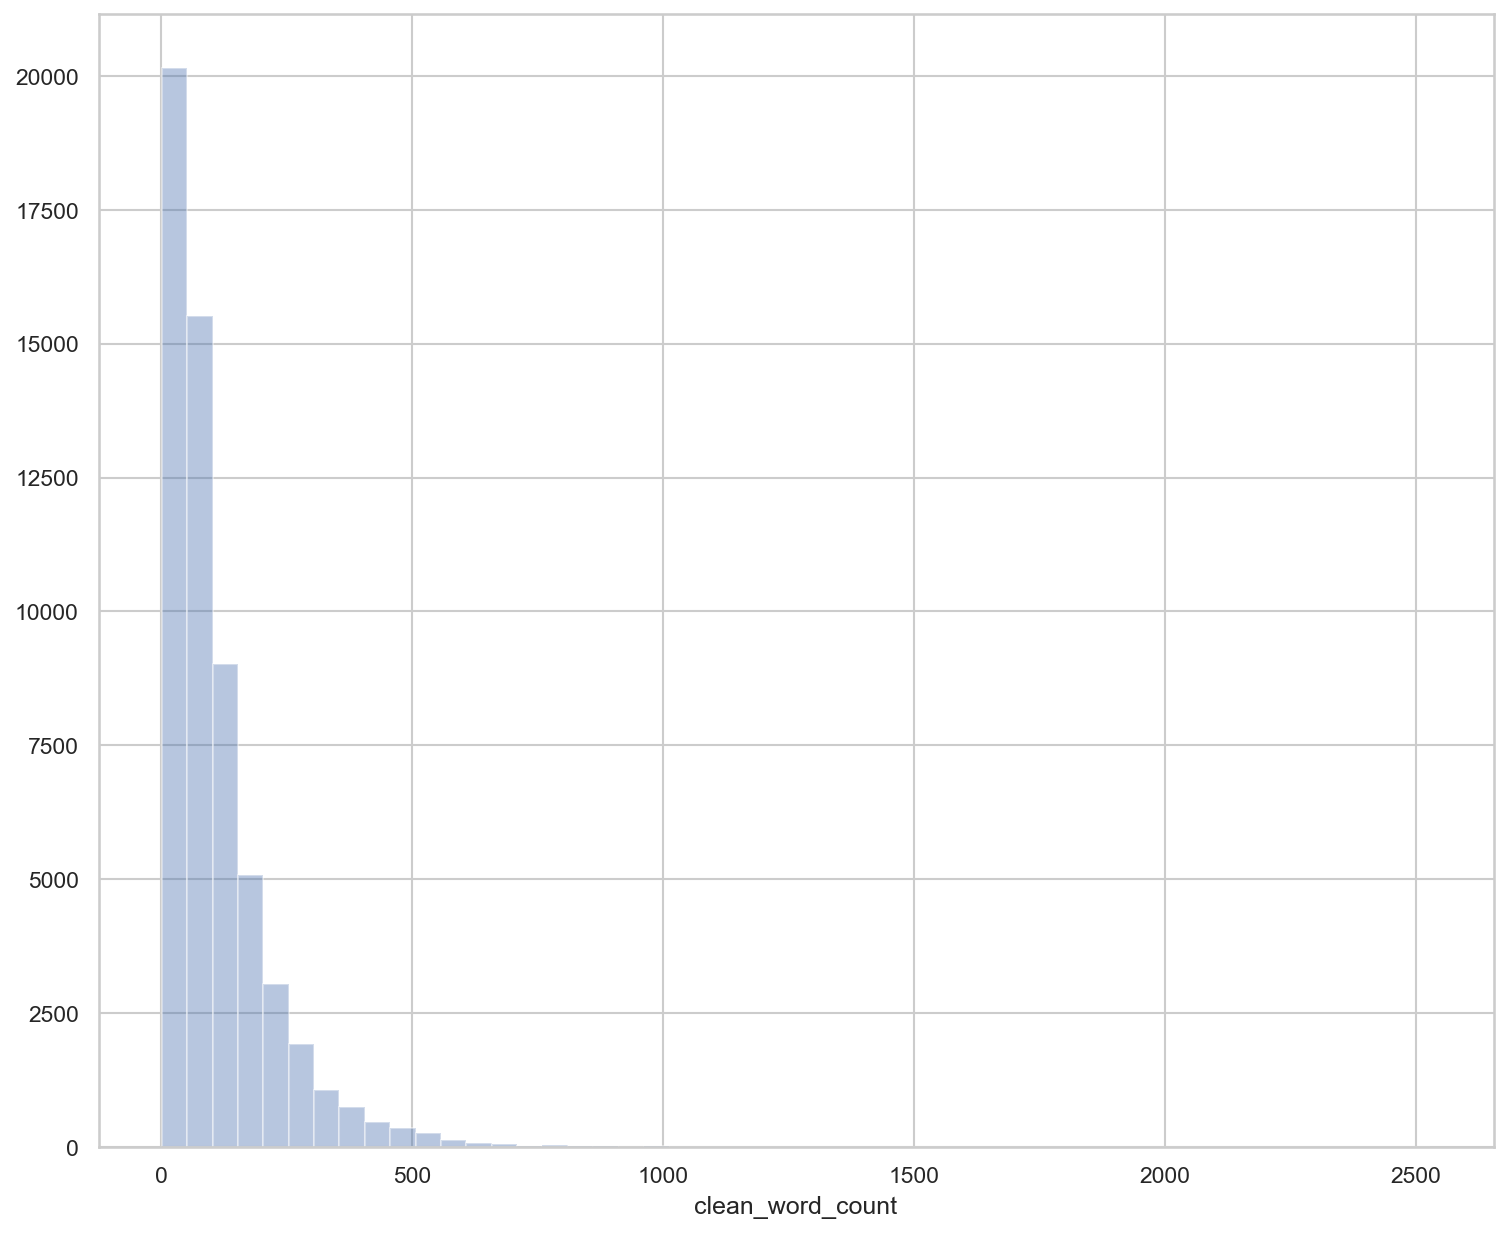

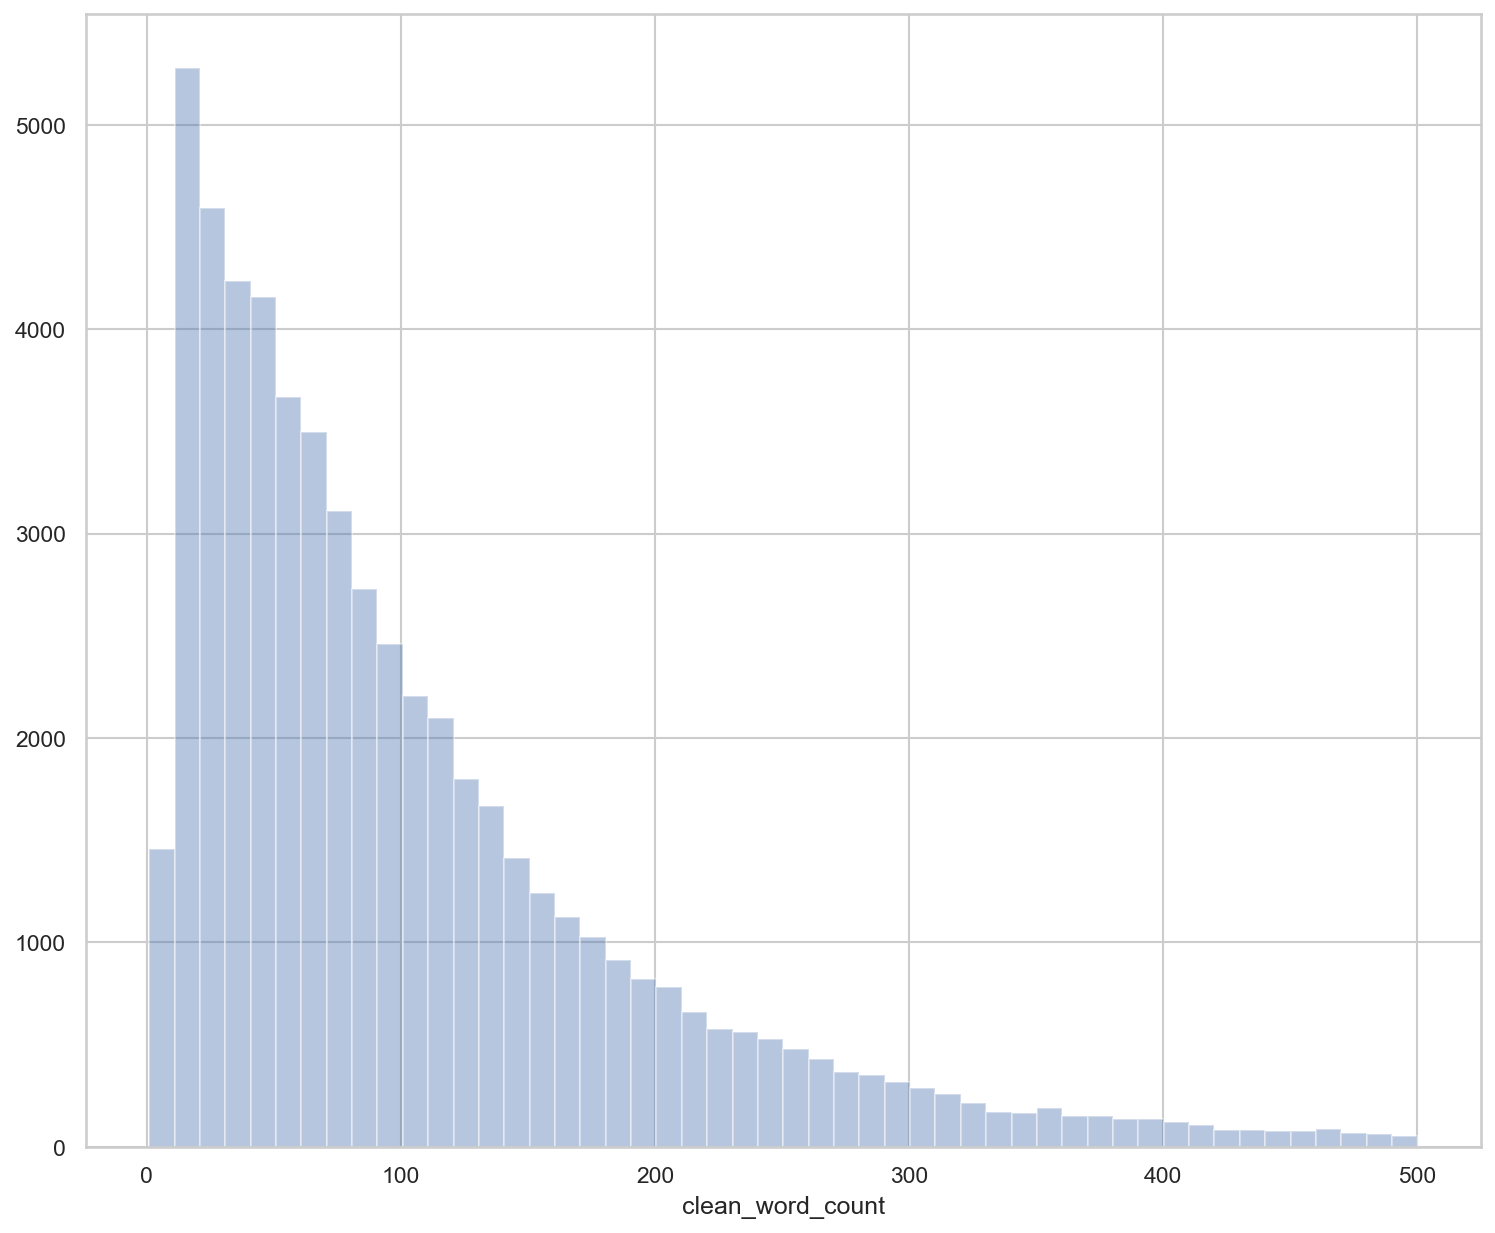

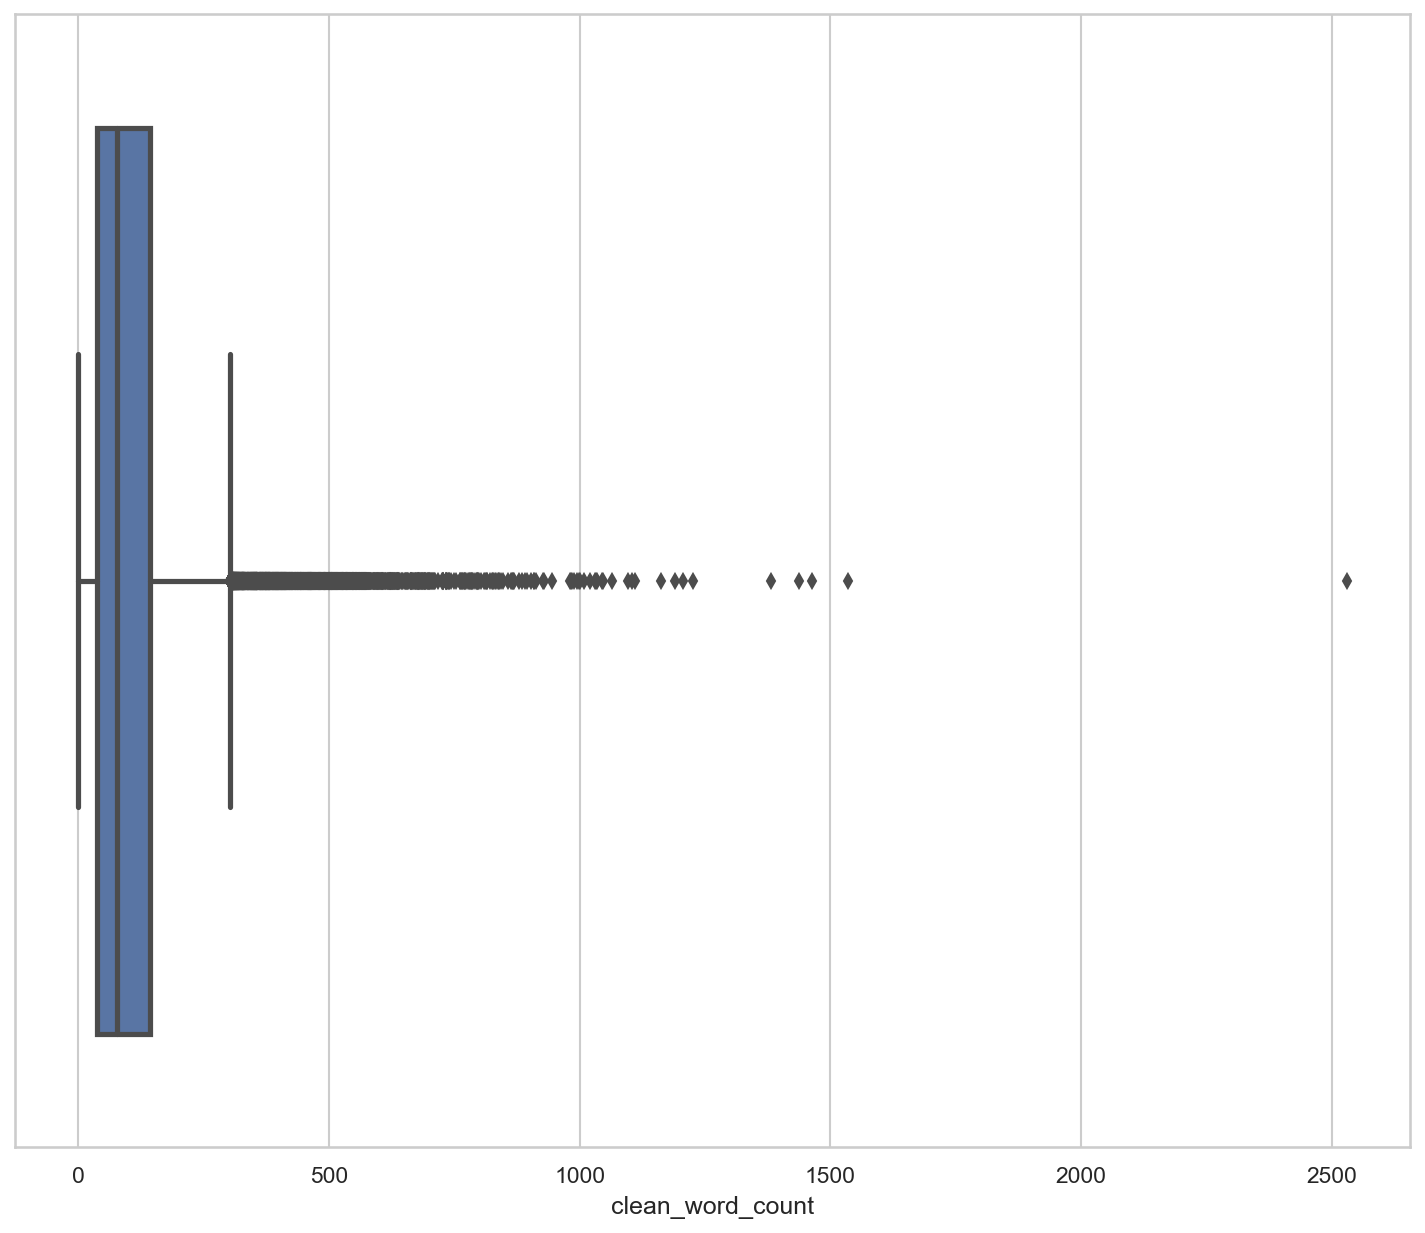

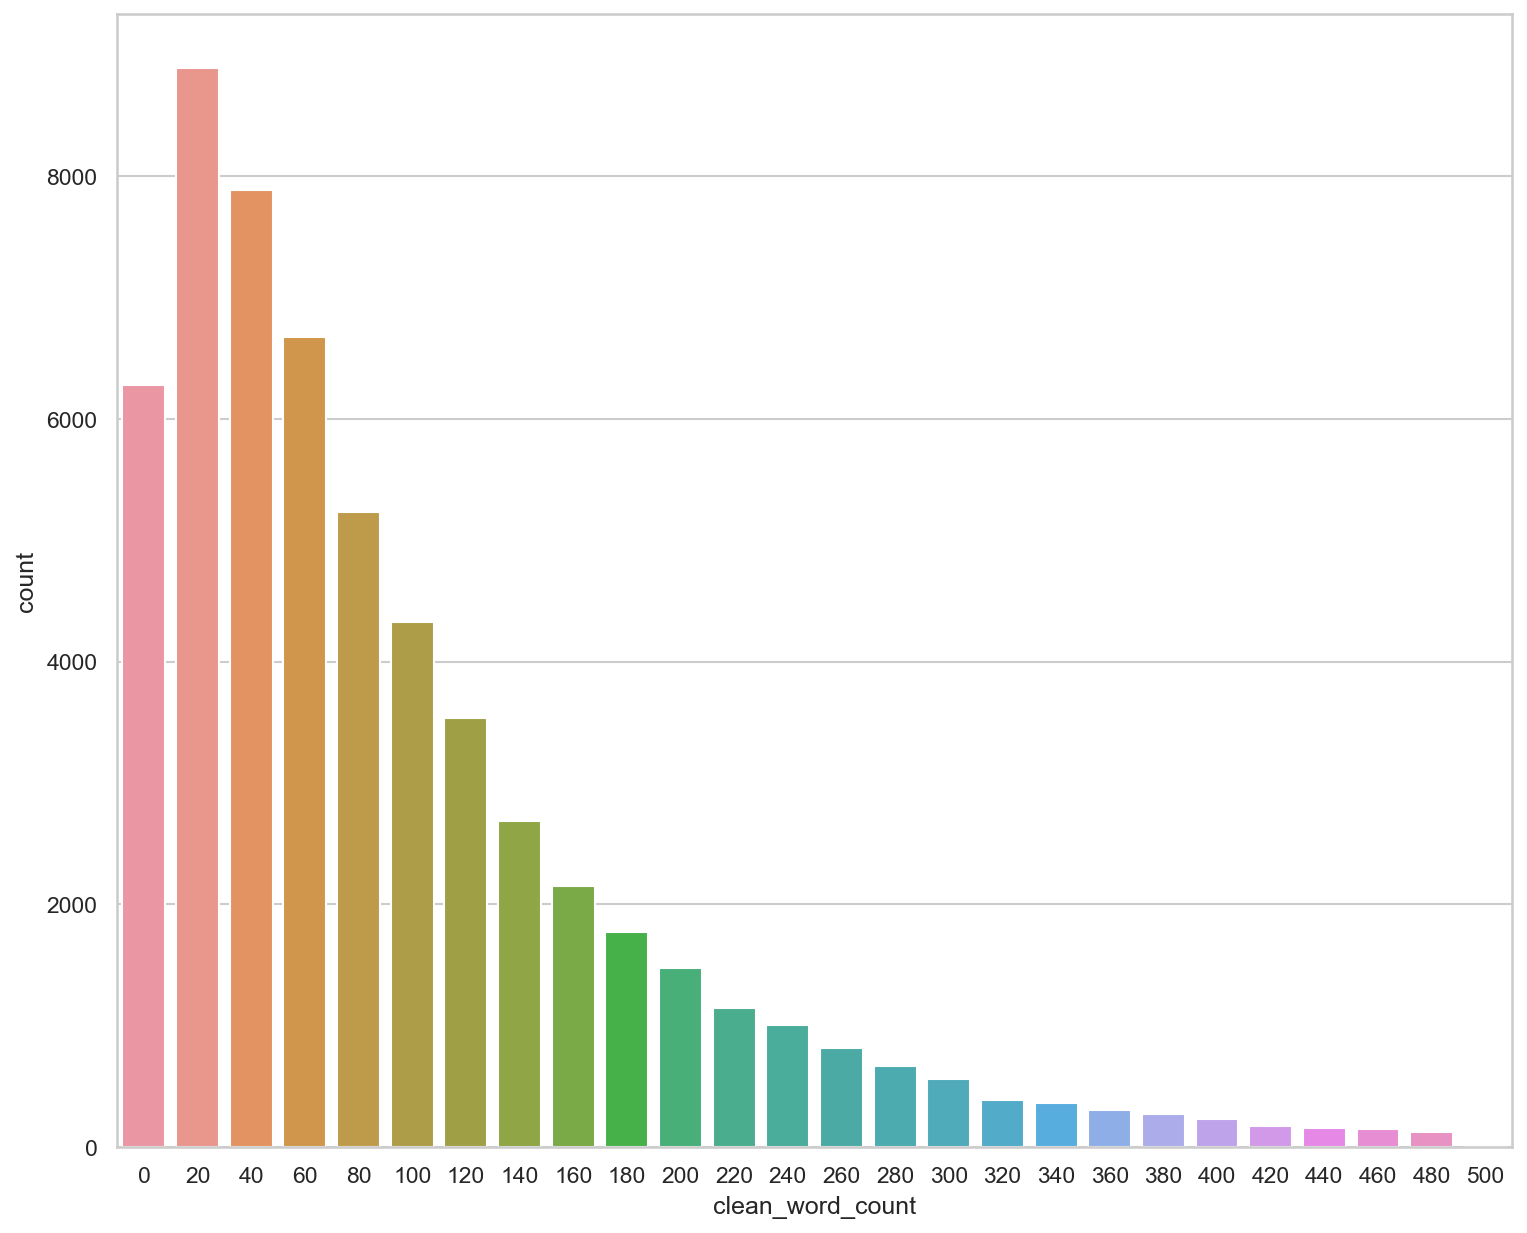

In [179]:
ax = sns.distplot(prep_df.clean_word_count, kde=False)
plt.show()

ax = sns.distplot(prep_df[prep_df.clean_word_count <= 500].clean_word_count, kde=False)
plt.show()

ax = sns.boxplot(x=prep_df.clean_word_count)
plt.show()

ax = sns.countplot(x=round(prep_df[prep_df.clean_word_count <= 500].clean_word_count//20)*20)
plt.show()




### ✅ 2.  Describe the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process.

#### ✅ Goals
The tokenization process is to separate the text into smaller chunks or tokens. The chunks can be words, characters, or sub-word. A unique index called "word_index" is assigned to each word in the text which helps the model during the training process (TensorFlow, n.d; MLK, 2021).

Other goals that the tokenization process can achieve  include: 
- Replacing any abnormal character, formatting, and standardizing texts,
- Lemmatizing words and transforming the text into sequences, and
- Preparing the transformed sequences to a maximum sequence length by padding. 


#### ✅ including any code generated

#### ✅ packages that are used to normalize text during the tokenization process.

- tensorflow.keras.preprocessing.text
    - Tokenizer(num_words=vocab_size, oov_token="<UNK>" )
- nltk
    - from nltk.tokenize import RegexpTokenizer
    - LEMMA = nltk.WordNetLemmatizer()
    - STOP_WORDS = stopwords.words('english')
    - RegexpTokenizer, # tokenize on non-word and non-space characters




In [ ]:
t = Tokenizer(num_words=vocab_size, oov_token="<UNK>" )
t.fit_on_texts(prep_df.words)

list(t.word_index.items())[:10]

In [238]:
# t.texts_to_sequences(prep_df.words.values[:5])

prep_df["encoded_text"] = TOKENIZER.texts_to_sequences(prep_df.clean_text.values)

prep_df.head()




,raw_text,sentiment,raw_word_count,clean_text,clean_word_count,encoded_text,encoded_text2
0,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,153,hard believe memory tree came year ago ha held well passage time enya's last great album new age pop amarantine day without rain back enya still creative spark voice agree reviewer said saddest album melancholy bittersweet opening title song memory tree elegaic majestic pax deorum sound like requiem mass dark threnody unlike reviewer said ha disconcerting blend spirituality sensuality find disconcerting anywhere hopeful song looking possibility hope ha place love listener decide romantic platonic etc i've always soft spot song way home triumphant ending return truly masterpiece new age music must enya fan,93,"[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34]","[[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34, 0, 0, 0, 0, 0, 0, 0, ...]]"
1,"A clasically-styled and introverted album, Memory of Trees is a masterpiece of subtlety. Many of the songs have an endearing shyness to them - soft piano and a lovely, quiet voice. But within every introvert is an inferno, and Enya lets that fire explode on a couple of songs that absolutely burst with an expected raw power.If you've never heard Enya before, you might want to start with one of her more popularized works, like Watermark, just to play it safe. But if you're already a fan, then your collection is not complete without this beautiful work of musical art.",5,103,clasically styled introverted album memory tree masterpiece subtlety many song endearing shyness soft piano lovely quiet voice within every introvert inferno enya let fire explode couple song absolutely burst expected raw power never heard enya might want start one popularized work like watermark play safe already fan collection complete without beautiful work musical art,54,"[1, 3077, 1, 2, 787, 1476, 320, 4752, 42, 3, 4295, 1, 552, 190, 753, 985, 59, 856, 67, 1, 1, 1, 179, 372, 1, 340, 3, 489, 2690, 1225, 613, 308, 61, 62, 1, 224, 87, 125, 6, 1, 52, 7, 1, 145, 1794, 272, 34, 107, 560, 149, 119, 52, 141, 508]","[[1, 3077, 1, 2, 787, 1476, 320, 4752, 42, 3, 4295, 1, 552, 190, 753, 985, 59, 856, 67, 1, 1, 1, 179, 372, 1, 340, 3, 489, 2690, 1225, 613, 308, 61, 62, 1, 224, 87, 125, 6, 1, 52, 7, 1, 145, 1794, 272, 34, 107, 560, 149, 119, 52, 141, 508, 0, 0, 0, 

### 3.  Explain the padding process used to standardize the length of sequences, including the following in your explanation:











In [262]:


# t = tf.keras.preprocessing.text.Tokenizer(oov_token = '[UNK]', lower=True)
# seq_train = t.texts_to_sequences(prep_df.words.values)
# seq_train
# pad_train = pad_sequences(sequences=seq_train, maxlen=50, padding="post", truncating="post")
# pad_train

max_review_length
prep_df["padded_text"] = prep_df["encoded_text"].apply(lambda x: pad_sequences(sequences=[x], maxlen=max_review_length, padding="post", truncating="post")[0] )
prep_df.head()

316

,raw_text,sentiment,raw_word_count,clean_text,clean_word_count,encoded_text,padded_text
0,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,153,hard believe memory tree came year ago ha held well passage time enya's last great album new age pop amarantine day without rain back enya still creative spark voice agree reviewer said saddest album melancholy bittersweet opening title song memory tree elegaic majestic pax deorum sound like requiem mass dark threnody unlike reviewer said ha disconcerting blend spirituality sensuality find disconcerting anywhere hopeful song looking possibility hope ha place love listener decide romantic platonic etc i've always soft spot song way home triumphant ending return truly masterpiece new age music must enya fan,93,"[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34]","[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34, 0, 0, 0, 0, 0, 0, 0, ...]"
1,"A clasically-styled and introverted album, Memory of Trees is a masterpiece of subtlety. Many of the songs have an endearing shyness to them - soft piano and a lovely, quiet voice. But within every introvert is an inferno, and Enya lets that fire explode on a couple of songs that absolutely burst with an expected raw power.If you've never heard Enya before, you might want to start with one of her more popularized works, like Watermark, just to play it safe. But if you're already a fan, then your collection is not complete without this beautiful work of musical art.",5,103,clasically styled introverted album memory tree masterpiece subtlety many song endearing shyness soft piano lovely quiet voice within every introvert inferno enya let fire explode couple song absolutely burst expected raw power never heard enya might want start one popularized work like watermark play safe already fan collection complete without beautiful work musical art,54,"[1, 3077, 1, 2, 787, 1476, 320, 4752, 42, 3, 4295, 1, 552, 190, 753, 985, 59, 856, 67, 1, 1, 1, 179, 372, 1, 340, 3, 489, 2690, 1225, 613, 308, 61, 62, 1, 224, 87, 125, 6, 1, 52, 7, 1, 145, 1794, 272, 34, 107, 560, 149, 119, 52, 141, 508]","[1, 3077, 1, 2, 787, 1476, 320, 4752, 42, 3, 4295, 1, 552, 190, 753, 985, 59, 856, 67, 1, 1, 1, 179, 372, 1, 340, 3, 489, 2690, 1225, 613, 308, 61, 62, 1, 224, 87, 125, 6, 1, 52, 7, 1, 145, 1794, 272, 34, 107, 560, 149, 119, 52, 141, 508, 0, 0, 0, 0, 0,

#### ✅ a. if the padding occurs before or after the text sequence

The padding occurs after the text sequence

#### b. a screenshot of a single padded sequence

In [266]:
print(f"{prep_df.raw_text[0] = }", end="\n\n")

print(f"{prep_df.clean_text[0] = }", end="\n\n")

print(f"{prep_df.encoded_text[0] = }", end="\n\n")

print(f"{prep_df.padded_text[0] = }", end="\n\n")

prep_df.raw_text[0] = 'It\'s hard to believe "Memory of Trees" came out 11 years ago;it has held up well over the passage of time.It\'s Enya\'s last great album before the New Age/pop of "Amarantine" and "Day without rain." Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song."Memory of Trees" is elegaic&majestic.;"Pax Deorum" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a "disconcerting" blend of spirituality&sensuality;,I don\'t find it disconcerting at all."Anywhere is" is a hopeful song,looking to possibilities."Hope has a place" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I\'ve always had a soft spot for this song."On my way home" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!'

prep_df.clean_text[

### ✅ 4.  Identify how many categories of sentiment will be used and an activation function for the final dense layer of the network.

Two sentiment categories will be used: positive — represented by 1 and negative — represented by 0. The activation function on the final dense layer will be the sigmoid function.

### 5.  Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split.

In [272]:
prep_df.head(1)

,raw_text,sentiment,raw_word_count,clean_text,clean_word_count,encoded_text,padded_text,pos_neg_sentiment
0,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,153,hard believe memory tree came year ago ha held well passage time enya's last great album new age pop amarantine day without rain back enya still creative spark voice agree reviewer said saddest album melancholy bittersweet opening title song memory tree elegaic majestic pax deorum sound like requiem mass dark threnody unlike reviewer said ha disconcerting blend spirituality sensuality find disconcerting anywhere hopeful song looking possibility hope ha place love listener decide romantic platonic etc i've always soft spot song way home triumphant ending return truly masterpiece new age music must enya fan,93,"[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34]","[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34, 0, 0, 0, 0, 0, 0, 0, ...]",1


In [273]:
from sklearn.model_selection import train_test_split

X, y = prep_df["padded_text"], prep_df["pos_neg_sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

cols = ["padded_text", "pos_neg_sentiment"]
train_df= pd.DataFrame(zip(X_train, y_train), columns=cols)
train_df.head(1)
train_df.pos_neg_sentiment.value_counts()


test_df= pd.DataFrame(zip(X_test, y_test), columns=cols)
test_df.head(1)
test_df.pos_neg_sentiment.value_counts()


,raw_text,sentiment,raw_word_count,clean_text,clean_word_count,encoded_text,padded_text,pos_neg_sentiment
0,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,153,hard believe memory tree came year ago ha held well passage time enya's last great album new age pop amarantine day without rain back enya still creative spark voice agree reviewer said saddest album melancholy bittersweet opening title song memory tree elegaic majestic pax deorum sound like requiem mass dark threnody unlike reviewer said ha disconcerting blend spirituality sensuality find disconcerting anywhere hopeful song looking possibility hope ha place love listener decide romantic platonic etc i've always soft spot song way home triumphant ending return truly masterpiece new age music must enya fan,93,"[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34]","[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34, 0, 0, 0, 0, 0, 0, 0, ...]",1
1,"A clasically-styled and introverted album, Memory of Trees is a masterpiece of subtlety. Many of the songs have an endearing shyness to them - soft piano and a lovely, quiet voice. But within every introvert is an inferno, and Enya lets that fire explode on a couple of songs that absolutely burst with an expected raw power.If you've never heard Enya before, you might want to start with one of her more popularized works, like Watermark, just to play it safe. But if you're already a fan, then your collection is not complete without this beautiful work of musical art.",5,103,clasically styled introverted album memory tree masterpiece subtlety many song endearing shyness soft piano lovely quiet voice within every introvert inferno enya let fire explode couple song absolutely burst expected raw power never heard enya might want start one popularized work like watermark play safe already fan collection complete without beautiful work musical art,54,"[1, 3077, 1, 2, 787, 1476, 320, 4752, 42, 3, 4295, 1, 552, 190, 753, 985, 59, 856, 67, 1, 1, 1, 179, 372, 1, 340, 3, 489, 2690, 1225, 613, 308, 61, 62, 1, 224, 87, 125, 6, 1, 52, 7, 1, 145, 1794, 272, 34, 107, 560, 149, 119, 52, 141, 508]","[1, 3077, 1, 2, 787, 1476, 320, 4752, 42, 3, 4295, 1, 552, 190, 753, 985, 59, 856, 67, 1, 1, 1, 179, 372, 1, 340, 3, 489, 2690, 1225, 613, 308, 61, 62, 1, 224, 87, 125, 6, 1, 52, 7, 1, 145, 1794, 272, 34, 107, 560, 149, 119, 52, 141,

,padded_text,pos_neg_sentiment
0,"[1153, 54, 756, 2531, 722, 3, 62, 157, 3511, 105, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",1


1    41692
0     4641
Name: pos_neg_sentiment, dtype: int64

,padded_text,pos_neg_sentiment
0,"[168, 17, 143, 13, 1449, 3866, 1762, 1, 4192, 3443, 1, 10, 3600, 2810, 143, 324, 21, 797, 2447, 1564, 541, 360, 40, 145, 509, 584, 245, 539, 222, 353, 49, 361, 3703, 57, 215, 14, 7, 40, 145, 509, 260, 49, 84, 1, 1, 3866, 1762, 10, 88, 1, 3280, 10, 82, 4762, 1921, 20, 56, 1, 4192, 1, 29, 1, 16, 1, 1, 92, 1, 7, 423, 134, 49, 81, 1, 61, 20, 25, 10, 136, 201, 7, 81, 134, 1283, 61, 78, 3866, 1762, 1, 1132, 499, 1, 35, 82, 4762, 574, 48, 267, 957, 1790, 3, ...]",0


1    10424
0     1160
Name: pos_neg_sentiment, dtype: int64

### ✅ 6.  Provide a copy of the prepared dataset.

In [289]:

# prep_df.to_csv("./reviews_Digital_Music_5_prepared.csv", index=True)
prep_df.to_json("./reviews_Digital_Music_5_prepared.json", orient="records")
# train_df.to_csv("./reviews_Digital_Music_5_prepared_train.csv", index=False)
train_df.to_json("./reviews_Digital_Music_5_prepared_train.json", orient="records")
# test_df.to_csv("./reviews_Digital_Music_5_prepared_test.csv", index=False)
test_df.to_json("./reviews_Digital_Music_5_prepared_test.json", orient="records")

prep_df.head(1)
train_df.head(1)
test_df.head(1)

,raw_text,sentiment,raw_word_count,clean_text,clean_word_count,encoded_text,padded_text,pos_neg_sentiment
0,"It's hard to believe ""Memory of Trees"" came out 11 years ago;it has held up well over the passage of time.It's Enya's last great album before the New Age/pop of ""Amarantine"" and ""Day without rain."" Back in 1995,Enya still had her creative spark,her own voice.I agree with the reviewer who said that this is her saddest album;it is melancholy,bittersweet,from the opening title song.""Memory of Trees"" is elegaic&majestic.;""Pax Deorum"" sounds like it is from a Requiem Mass,it is a dark threnody.Unlike the reviewer who said that this has a ""disconcerting"" blend of spirituality&sensuality;,I don't find it disconcerting at all.""Anywhere is"" is a hopeful song,looking to possibilities.""Hope has a place"" is about love,but it is up to the listener to decide if it is romantic,platonic,etc.I've always had a soft spot for this song.""On my way home"" is a triumphant ending about return.This is truly a masterpiece of New Age music,a must for any Enya fan!",5,153,hard believe memory tree came year ago ha held well passage time enya's last great album new age pop amarantine day without rain back enya still creative spark voice agree reviewer said saddest album melancholy bittersweet opening title song memory tree elegaic majestic pax deorum sound like requiem mass dark threnody unlike reviewer said ha disconcerting blend spirituality sensuality find disconcerting anywhere hopeful song looking possibility hope ha place love listener decide romantic platonic etc i've always soft spot song way home triumphant ending return truly masterpiece new age music must enya fan,93,"[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34]","[86, 289, 787, 1476, 161, 30, 439, 9, 1917, 22, 2745, 15, 1, 84, 11, 2, 32, 475, 48, 1, 66, 149, 705, 36, 1, 24, 587, 1680, 59, 1016, 694, 208, 1, 2, 1399, 3332, 414, 110, 3, 787, 1476, 1, 3736, 1, 1, 14, 7, 1, 1685, 297, 1, 697, 694, 208, 9, 1, 815, 4958, 1, 115, 1, 1760, 3975, 3, 381, 3943, 383, 9, 222, 16, 305, 2436, 978, 1, 533, 138, 92, 552, 1009, 3, 35, 318, 1, 1079, 595, 240, 320, 32, 475, 10, 159, 1, 34, 0, 0, 0, 0, 0, 0, 0, ...]",1


,padded_text,pos_neg_sentiment
0,"[1153, 54, 756, 2531, 722, 3, 62, 157, 3511, 105, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",1


,padded_text,pos_neg_sentiment
0,"[168, 17, 143, 13, 1449, 3866, 1762, 1, 4192, 3443, 1, 10, 3600, 2810, 143, 324, 21, 797, 2447, 1564, 541, 360, 40, 145, 509, 584, 245, 539, 222, 353, 49, 361, 3703, 57, 215, 14, 7, 40, 145, 509, 260, 49, 84, 1, 1, 3866, 1762, 10, 88, 1, 3280, 10, 82, 4762, 1921, 20, 56, 1, 4192, 1, 29, 1, 16, 1, 1, 92, 1, 7, 423, 134, 49, 81, 1, 61, 20, 25, 10, 136, 201, 7, 81, 134, 1283, 61, 78, 3866, 1762, 1, 1132, 499, 1, 35, 82, 4762, 574, 48, 267, 957, 1790, 3, ...]",0


In [287]:
train_df.to_json("./reviews_Digital_Music_5_prepared_train.json", orient="records")

# Part III:  Network Architecture



## C.  Describe the type of network used by doing the following:



In [292]:
%%time
# load the prepared data and reset the dataframe
df = pd.read_json("./reviews_Digital_Music_5_prepared_train.json")

df.head(1)


CPU times: user 603 ms, sys: 45.6 ms, total: 649 ms
Wall time: 649 ms


,padded_text,pos_neg_sentiment
0,"[1153, 54, 756, 2531, 722, 3, 62, 157, 3511, 105, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",1


#### EXAMPLE

In [ ]:
from tensorflow.keras.datasets import imdb

tf.__version__

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=20000)

X_train, y_train, X_test, y_test
X_train.shape

In [ ]:
X_train = pad_sequences(X_train, maxlen=100)
X_train.shape

X_test = pad_sequences(X_test, maxlen=100)
X_test.shape

In [ ]:
vocab_size = 20000
embed_size = 128

In [ ]:
# BUILD THE NETWORK
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping

# `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_shape=(X_train.shape[1],) )) 
model.add(LSTM(units=60, activation="tanh"))
model.add(Dense(units=1, activation="sigmoid"))

# Configures the model for training.
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")

# Prints a string summary of the network.
model.summary()

In [ ]:
# Stop training when a monitored metric has stopped improving.
# helps avoid overfitting
# Assuming the goal of a training is to minimize the loss. With this, the
# metric to be monitored would be `'loss'`, and mode would be `'min'`. A
# `model.fit()` training loop will check at end of every epoch whether
# the loss is no longer decreasing, considering the `min_delta` and
# `patience` if applicable. Once it's found no longer decreasing,
# `model.stop_training` is marked True and the training terminates.

early_stopping_monitor = EarlyStopping(patience=2)

# Trains the model for a fixed number of epochs (iterations on a dataset).
history = model.fit(x=X_train, y=y_train, epochs=5, batch_size = 128, validation_data=(X_test, y_test))

In [ ]:
history.history

In [ ]:
# PLOT TRAINING AND VALIDATION ACCURACY SCORES

hist_df = pd.DataFrame(history.history)

num_epochs = range(1,6) 

_ = sns.lineplot(hist_df[["accuracy", "val_accuracy"]])
_ = plt.xticks(ticks=range(0,5), labels=num_epochs)
plt.show()

_ = sns.lineplot(hist_df[["loss", "val_loss"]])
_ = plt.xticks(ticks=range(0,5), labels=num_epochs)
plt.show()


In [ ]:
# MODEL EVALUATION AGAINST TEST
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy 

In [ ]:
# CONFUSION MATRIX

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# https://stackoverflow.com/questions/50920908/get-confusion-matrix-from-a-keras-multiclass-model
y_pred = model.predict(X_test).argmax(axis=1)
# tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()


In [ ]:
y_pred
y_test

def create_cm(y_test, y_pred, display_labels=[0,1]):    
    cm = confusion_matrix(y_test, y_pred)
    cm

    (tn, fp), (fn, tp) = cm

    tn, fp, fn, tp

    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()
    plt.show()


In [ ]:
# SAVING THE MODEL
model.save("Trained_Model.keras")

### ✅ 1.  Provide the output of the model summary of the function from TensorFlow.

In [ ]:
embedding_vector_length = 32

# BUILD THE NETWORK
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

# `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
model = Sequential()

# Embedding
# Turns positive integers (indexes) into dense vectors of fixed size.
model.add(Embedding(input_dim=vocab_size + 1, output_dim=embedding_vector_length, input_length=avg_review_word_count )) 

# SpatialDropout1D
# This version performs the same function as Dropout, however, it drops
# entire 1D feature maps instead of individual elements. If adjacent frames
# within feature maps are strongly correlated (as is normally the case in
# early convolution layers) then regular dropout will not regularize the
# activations and will otherwise just result in an effective learning rate
# decrease. In this case, SpatialDropout1D will help promote independence
# between feature maps and should be used instead.
model.add(SpatialDropout1D(rate=0.25))

model.add(LSTM(units=60, dropout=0.5, recurrent_dropout=0.5))

# Dropout
# The Dropout layer randomly sets input units to 0 with a frequency of `rate`
# at each step during training time, which helps prevent overfitting.
# Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
# all inputs is unchanged.

# A simple solution to the overfitting problem is to use dropout, an operation that will randomly drop the weights connected to certain nodes in a layer during the training process, as shown on the right. This will force your network to develop more robust rules for classification, since it cannot rely on any particular nodes being passed to an activation function. This will tend to improve out-of-sample performance.
# we want to drop the weights connected to 20% of nodes randomly. We'll then pass this to the output layer, which reduces the 60 nodes to 1 and applies a sigmoid activation function
model.add(Dropout(rate=0.2))

# Dense
# output shape should be 1 since this is binary data
model.add(Dense(units=1, activation="sigmoid"))

# Configures the model for training.
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")

# Prints a string summary of the network.
model.summary()


### ✅ 2.  Discuss the number of layers, the type of layers, and total number of parameters.

- The network includes 5 layers.

- The type of layers includes:
    - Input Embedding Layer
    - Spatial Dropout Layer
    - LSTM Layer
    - Dropout Layer
    - Output Dense Layer
 

- The total number of parameters is 4,158,477


### 3.  ✅ Justify the choice of hyperparameters, including the following elements:



#### ✅ activation functions
- Using a sigmoid activation function


#### ✅ number of nodes per layer
- The type of layers includes:
    - Input Embedding Layer
        - 1 neuron per feature or column
        - 1 optional neuron to hold bias 
    - Spatial Dropout Layer
        - 1/2 # neurons from previous layer
    - LSTM Layer
        - 1/2 # neurons from previous layer    
    - Dropout Layer
        - 1/2 # neurons from previous layer    
    - Output Dense Layer
        - 1 neuron to represent positive (1) or negative (-1) sentiment


#### ✅loss function
The loss function is Binary Crossentrophy


#### ✅ optimizer

The optimizer is ADAM

#### ✅ stopping criteria

The stopping criteria is EarlyStopping with a patience of 2

#### ✅ evaluation metric
The model's evaluation metrics are accuracy and loss.

# Part IV:  Model Evaluation



## D.  Evaluate the model training process and its relevant outcomes by doing the following:



### 1.  Discuss the impact of using stopping criteria instead of defining the number of epochs, including a screenshot showing the final training epoch.

### 2.  ✅ Provide visualizations of the model’s training process, including a line graph of the loss and chosen evaluation metric.

In [ ]:
def plot_scores(history, num_epochs = range(1,6), ticks=range(0,5)):
    hist_df = pd.DataFrame(history.history)

    _ = sns.lineplot(hist_df[["accuracy", "val_accuracy"]])
    _ = plt.xticks(ticks=ticks, labels=num_epochs)
    plt.show()

    _ = sns.lineplot(hist_df[["loss", "val_loss"]])
    _ = plt.xticks(ticks=ticks, labels=num_epochs)
    plt.show()
    


### ✅ 3.  Assess the fitness of the model and any measures taken to address overfitting.

- dropout
- stopping criteria


### 4.  Discuss the predictive accuracy of the trained network.


In [ ]:
def create_cm(y_test, y_pred, display_labels=[0,1]):    
    cm = confusion_matrix(y_test, y_pred)
    cm

    (tn, fp), (fn, tp) = cm

    tn, fp, fn, tp

    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels).plot()
    plt.show()

In [ ]:
def predict_sentiment(text):
    tokenizer = Tokenizer(num_words=5000)
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen=199)
    prediction = int(model.predict(tw).round().item())
    return prediction

# predict_sentiment(text)
predict_sentiment(test_df.iloc[0].words)

# test_df.iloc[0].words


# Part V:  Summary and Recommendations



## E.  Provide the code used to save the trained network within the neural network.


## F.  Discuss the functionality of your neural network, including the impact of the network architecture.


## G.  Recommend a course of action based on your results.



# Part VI: Reporting



## H.  Create your neural network using an industry-relevant interactive development environment (e.g., a Jupyter Notebook). Include a PDF or HTML document of your executed notebook presentation.


## I.  List the web sources used to acquire data or segments of third-party code to support the application.


## J.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.


## K.  Demonstrate professional communication in the content and presentation of your submission.

